<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pricing-Barrier-options" data-toc-modified-id="Pricing-Barrier-options-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pricing Barrier options</a></span><ul class="toc-item"><li><span><a href="#Plot-realizations-of-the-stock-price-and-barrier" data-toc-modified-id="Plot-realizations-of-the-stock-price-and-barrier-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot realizations of the stock price and barrier</a></span></li><li><span><a href="#Plot-the-value-of-the-down-an-out-call-and-the-corresponding-vanilla" data-toc-modified-id="Plot-the-value-of-the-down-an-out-call-and-the-corresponding-vanilla-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot the value of the down-an-out call and the corresponding vanilla</a></span></li><li><span><a href="#Remarks" data-toc-modified-id="Remarks-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remarks</a></span></li></ul></li><li><span><a href="#Pricing-Asian-options" data-toc-modified-id="Pricing-Asian-options-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pricing Asian options</a></span><ul class="toc-item"><li><span><a href="#Plot-a-realization-of-the-stock-price-with-the-arithmetic-average" data-toc-modified-id="Plot-a-realization-of-the-stock-price-with-the-arithmetic-average-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot a realization of the stock price with the arithmetic average</a></span></li><li><span><a href="#Using-Monte-Carlo-plot-the-value-of-the-arithmetic-asian-call-together-with-the-corresponding-vanilla" data-toc-modified-id="Using-Monte-Carlo-plot-the-value-of-the-arithmetic-asian-call-together-with-the-corresponding-vanilla-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using Monte Carlo plot the value of the arithmetic asian call together with the corresponding vanilla</a></span></li><li><span><a href="#Remarkes" data-toc-modified-id="Remarkes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Remarkes</a></span></li></ul></li></ul></div>

# Pricing Barrier options

Consider a one-year down-and-out call struck at 103 with $S_0$ = 100, σ = 0.2 and r = 0.1, barrier at 90 with daily setting dates (N = 365). Plot some realizations of the stock price plotting also the barrier with a line. For each realization plot the value of the down-an-out call and the corresponding plain vanilla call as a function of time.


In [2]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
pd.options.display.max_rows = None

## Plot realizations of the stock price and barrier 

In [1]:
def stock_plot(S_0, rate, sig, steps, mat, num_sim):
    S0, r, sigma, N, T, I = S_0, rate, sig, steps, mat, num_sim  #I: number of simulations
    dt = T/N
    S = np.zeros((N+1 ,I)) 
    S[0] = S0 

    for j in range(1,N+1):  
        S[j] = S[j-1] + sigma*S[j-1]*np.random.normal(scale=np.sqrt(dt), size=I)+r*S[j-1]*dt 

    return(pd.DataFrame(S))

In [4]:
S = stock_plot(100, 0.1, 0.2, 365, 1, 5)
S.head()

,0,1,2,3,4
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.481881,101.779649,100.510565,99.137388,100.162408
2,101.048447,102.430591,100.068884,100.290798,100.063704
3,99.280369,101.286318,99.460819,101.001819,100.975240
4,97.676311,100.249133,99.575270,101.417381,103.456609


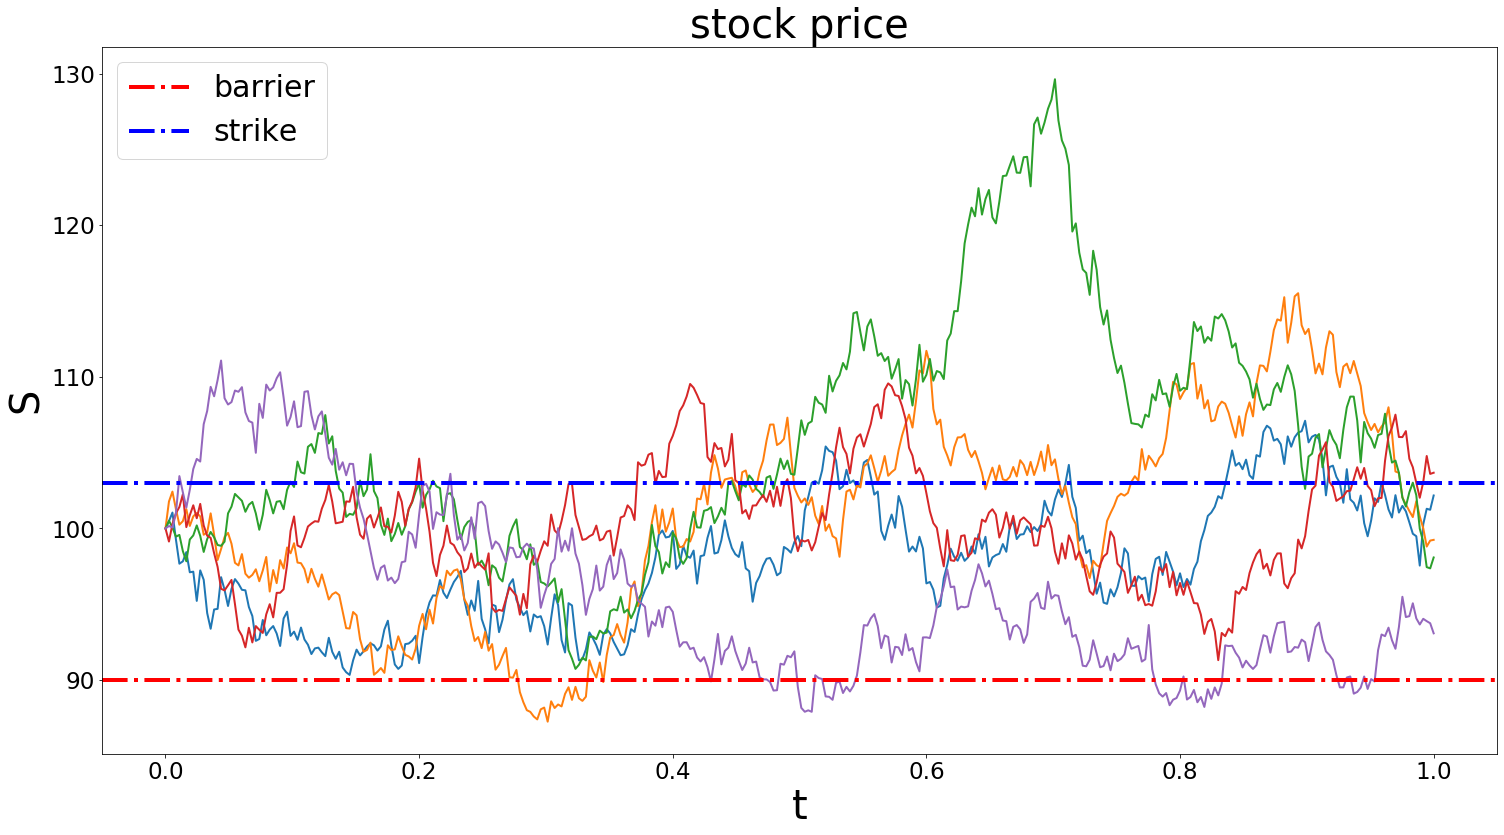

In [5]:
plt.figure(figsize=(25,13))         
plt.plot(S.rename(index = lambda x: x/365),lw = 2)
plt.axhline(y=90, color='r', linestyle='-.',lw = 4,label="barrier")
plt.axhline(y=103, color='b', linestyle='-.',lw = 4,label="strike")

plt.xlabel('t',fontsize=40)  
plt.ylabel('S',fontsize=40)  
plt.title('stock price',fontsize=40)
plt.legend(loc = 'upper left',fontsize=30)
plt.tick_params(labelsize=23)

plt.show()

## Plot the value of the down-an-out call and the corresponding vanilla

In [6]:
def vanilla(stockprice, rate, sig, steps, mat, struck): 
    stock, r, sigma, N, T, K = stockprice, rate, sig, steps, mat, struck 
    dt = T/N
    vanilla_prices = np.zeros((N+1,1))
    
    for j in range(0,N+1):
        if j == N:
            vanilla_prices[j] = max(stock[j]-K,0)
        else:
            d1 = (np.log(stock[j]/K)+(r+1/2*sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))
            d2 = (np.log(stock[j]/K)+(r-1/2*sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))  
            vanilla_prices[j]=stock[j]*norm.cdf(d1)-K*np.exp(-r*(T-j*dt))*norm.cdf(d2)
    
    return(vanilla_prices)

In [7]:
def barrier(stockprice, rate, sig, steps, mat, struck, barrier): 
    stock, r, sigma, N, T, K, H = stockprice, rate, sig, steps, mat, struck, barrier 
    dt = T/N 
    barrier_prices = np.zeros((N+1,1))
    
    for j in range(0,N+1):
        if  stock[j]>barrier:
            if j == N:
                barrier_prices[j] = np.max(stock[j]-K, 0)
            else:
                d1 = (np.log(stock[j]/K)+(r+1/2*sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))
                d2 = (np.log(stock[j]/K)+(r-1/2*sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))  
                h1 = (np.log(H**2/(K*stock[j]))+(r+1/2*sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))
                h2 = (np.log(H**2/(K*stock[j]))+(r-1/2*sigma**2)*(T-j*dt))/(sigma*np.sqrt(T-j*dt))

                barrier_prices[j]=stock[j]*norm.cdf(d1) \
                -stock[j]*(H/stock[j])**(1+2*r*sigma**(-2))*norm.cdf(h1) \
                -K*np.exp(-r*(T-j*dt))*norm.cdf(d2) \
                +K*np.exp(-r*(T-j*dt))*(H/stock[j])**(-1+2*r*sigma**(-2))*norm.cdf(h2)
        else:
            break
            
    return(barrier_prices)

option prices of realization 1
   stock prices  scaled stock prices  vanilla prices  barrier prices
0    100.000000             6.698902       11.566111        9.945574
1    100.481881             7.074186       11.867833       10.353633
2    101.048447             7.515422       12.231887       10.833038
3     99.280369             6.138462       11.010691        9.258534
4     97.676311             4.889238        9.951727        7.804562
5     97.832443             5.010832       10.025855        7.931877
     stock prices  scaled stock prices  vanilla prices  barrier prices
360     99.487266             6.299591        0.082366        0.082366
361     97.552147             4.792541        0.003674        0.003674
362    100.277700             6.915172        0.062929        0.062929
363    101.300249             7.711522        0.106441        0.106441
364    101.234207             7.660089        0.023376        0.023376
365    102.175741             8.393346        0.000000      

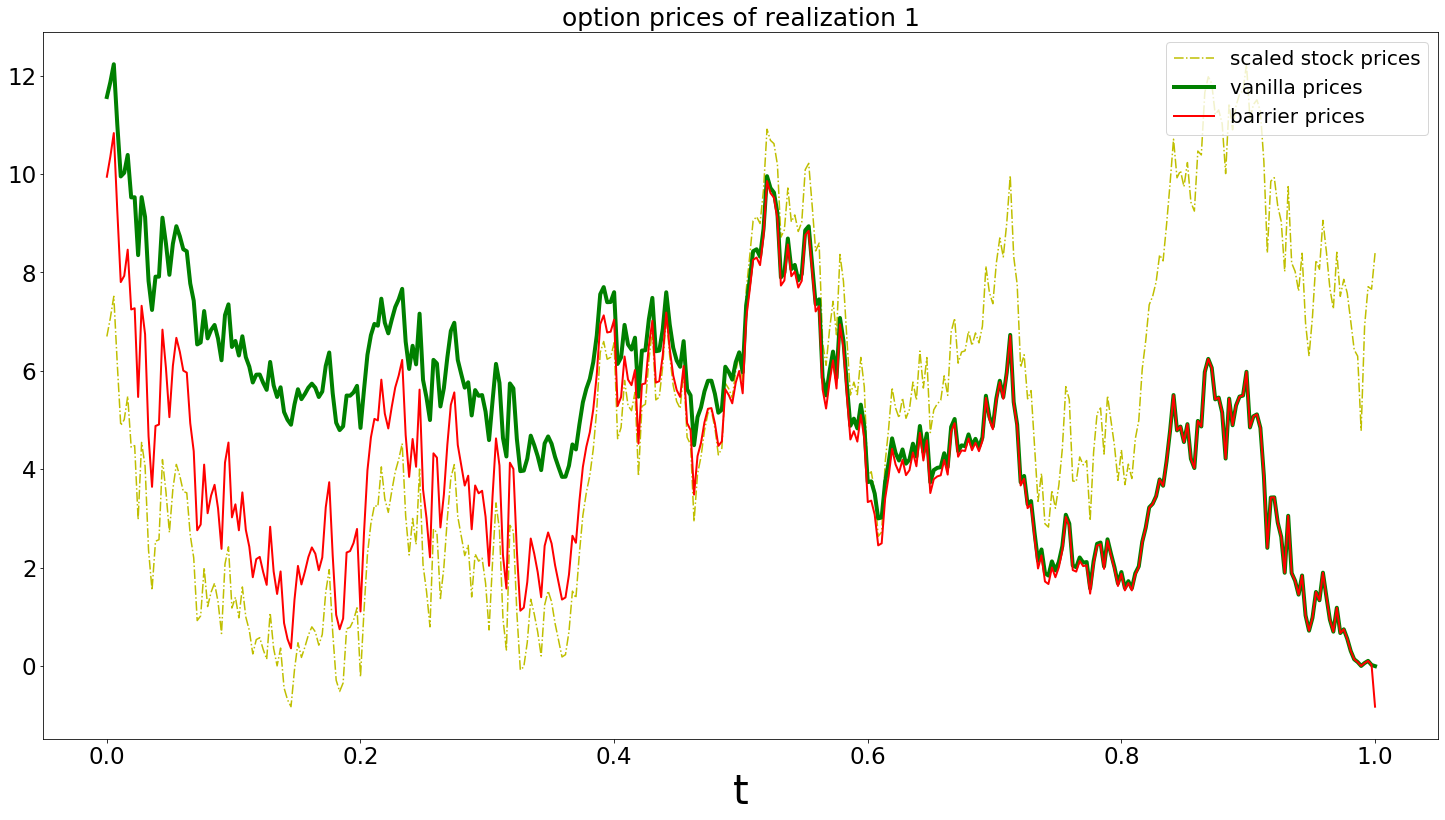




option prices of realization 2
   stock prices  scaled stock prices  vanilla prices  barrier prices
0    100.000000             6.292118       11.566111        9.945574
1    101.779649             7.170771       12.768546       11.490150
2    102.430591             7.492157       13.205173       12.037810
3    101.286318             6.927203       12.371399       11.022776
4    100.249133             6.415121       11.633503       10.097261
5    100.482409             6.530295       11.766606       10.284483
     stock prices  scaled stock prices  vanilla prices  barrier prices
360    101.800153             7.180895        0.518029             0.0
361    100.798546             6.686379        0.184656             0.0
362    100.015118             6.299582        0.045176             0.0
363     98.806669             5.702943        0.001254             0.0
364     99.201766             5.898011        0.000048             0.0
365     99.249174             5.921418        0.000000   

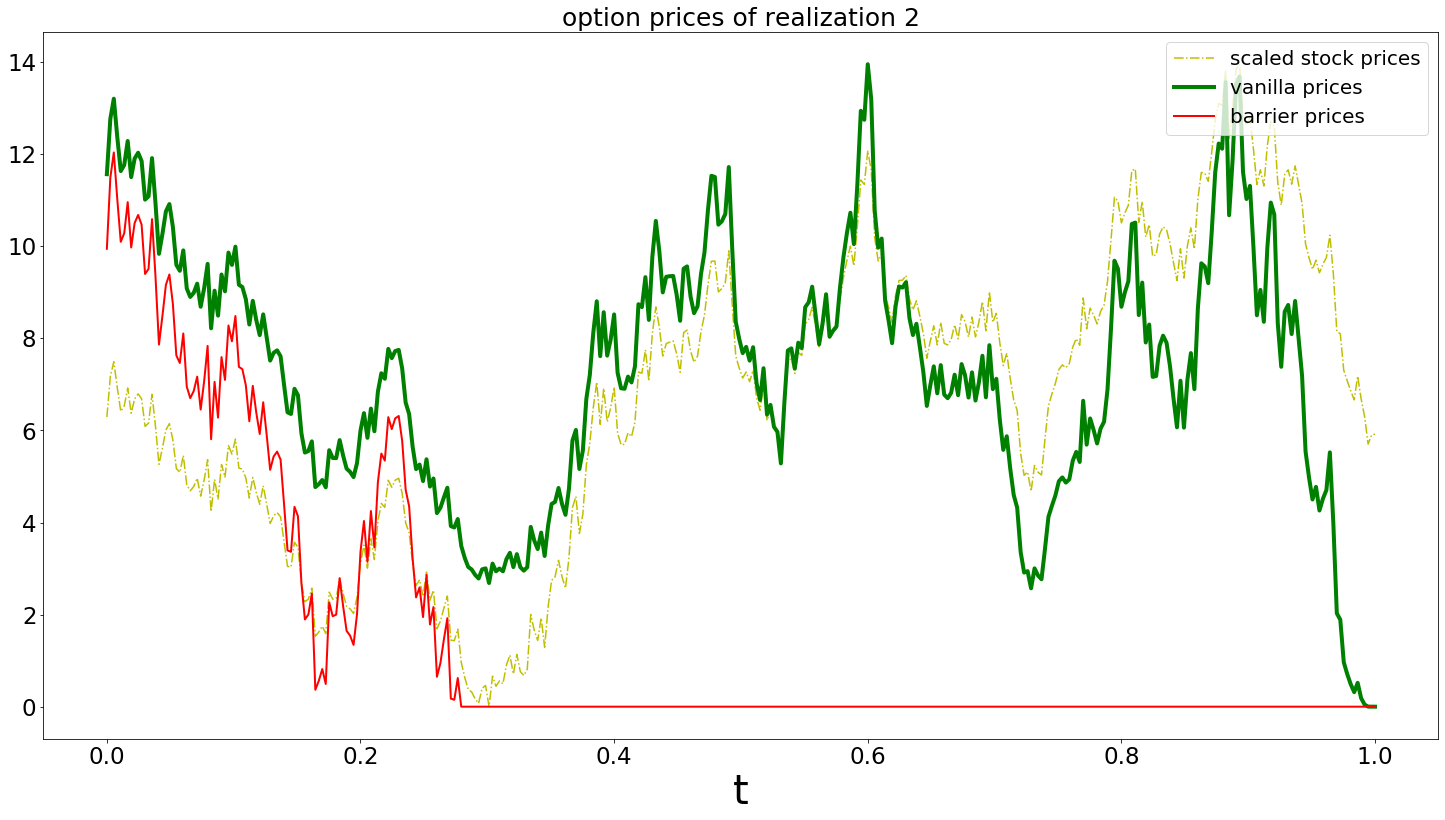




option prices of realization 3
   stock prices  scaled stock prices  vanilla prices  barrier prices
0    100.000000             3.329089       11.566111        9.945574
1    100.510565             3.783440       11.887422       10.378867
2    100.068884             3.390389       11.562178        9.972719
3     99.460819             2.849272       11.130115        9.418618
4     99.575270             2.951122       11.181104        9.503604
5     98.504725             1.998445       10.454986        8.536227
     stock prices  scaled stock prices  vanilla prices  barrier prices
360    102.191990             5.279739    6.606499e-01    6.606499e-01
361     99.981064             3.312238    8.342305e-02    8.342305e-02
362     99.124237             2.549749    1.286396e-02    1.286396e-02
363     97.450478             1.060272    3.779892e-05    3.779892e-05
364     97.368500             0.987320    8.340376e-09    8.340376e-09
365     98.086888             1.626613    0.000000e+00   

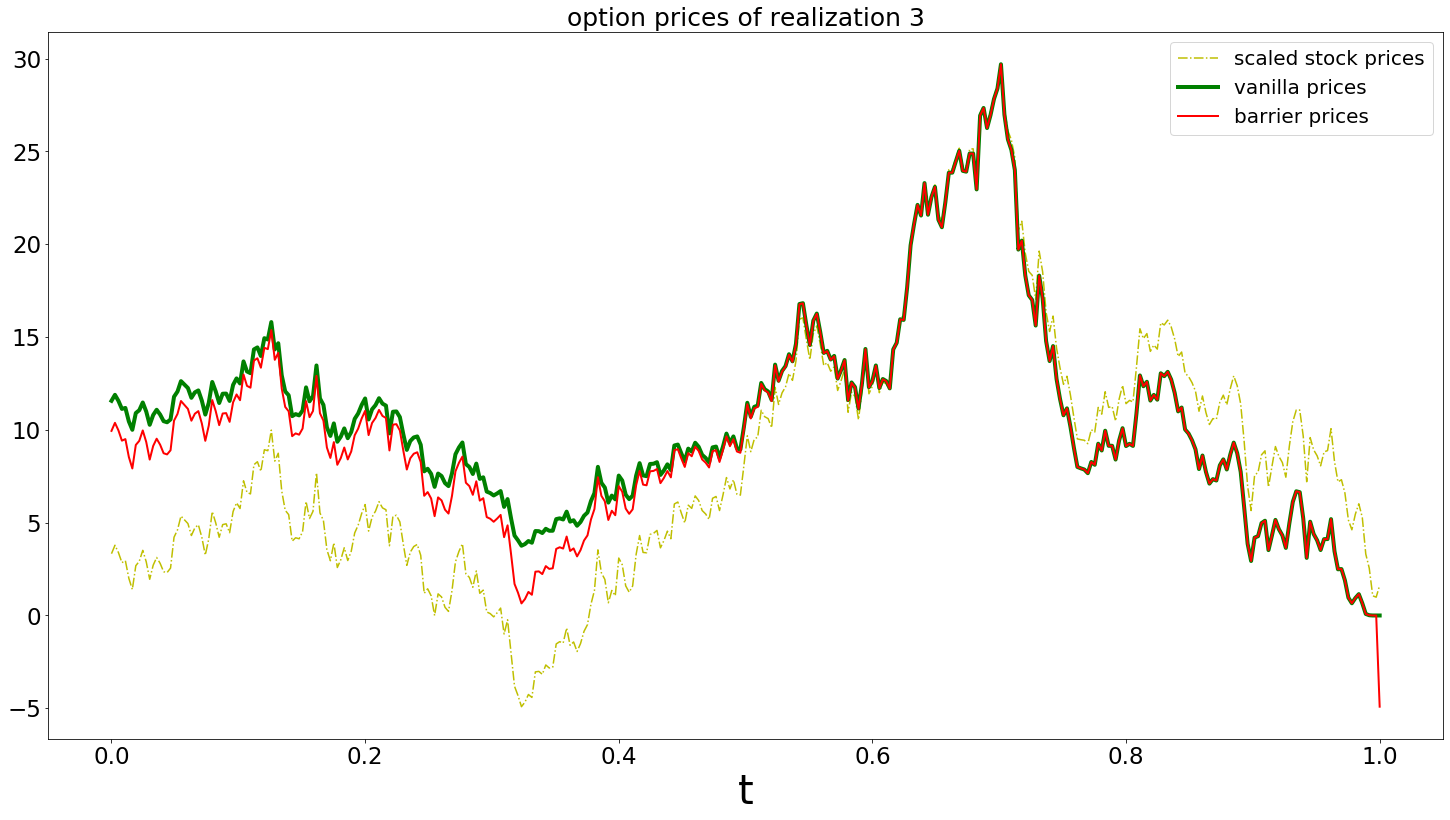




option prices of realization 4
   stock prices  scaled stock prices  vanilla prices  barrier prices
0    100.000000             6.944679       11.566111        9.945574
1     99.137388             6.277588       10.966241        9.163081
2    100.290798             7.169564       11.712400       10.168227
3    101.001819             7.719425       12.174055       10.774281
4    101.417381             8.040795       12.437061       11.118701
5    102.252051             8.686278       12.999679       11.824950
     stock prices  scaled stock prices  vanilla prices  barrier prices
360    103.010385             9.272728        1.038826        1.038826
361    102.025476             8.511059        0.493041        0.493041
362    103.061956             9.312609        0.820551        0.820551
363    104.782721            10.643345        1.926098        1.926098
364    103.598215             9.727319        0.814998        0.814998
365    103.676836             9.788120        0.676836   

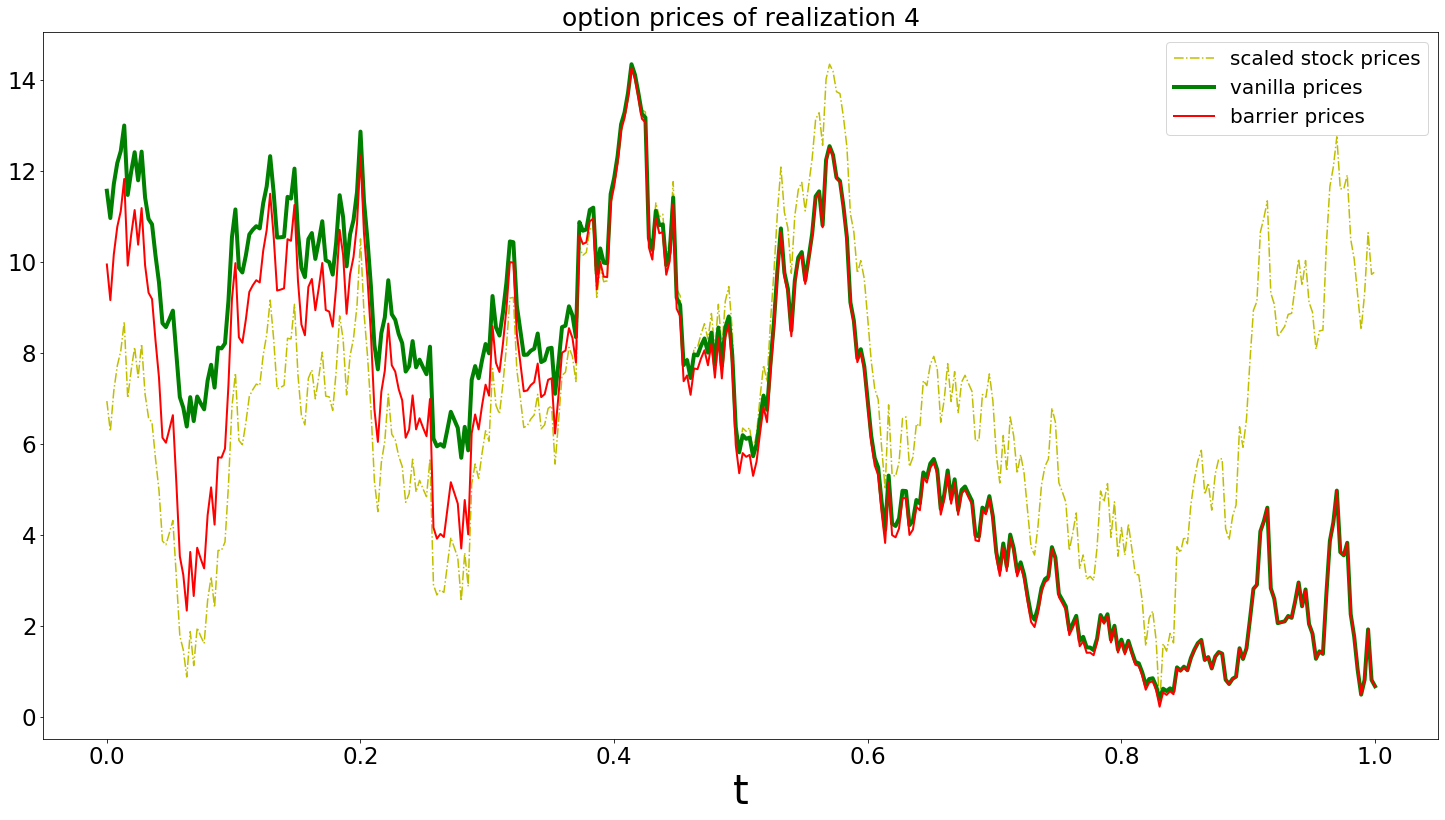




option prices of realization 5
   stock prices  scaled stock prices  vanilla prices  barrier prices
0    100.000000            10.209049       11.566111        9.945574
1    100.162408            10.346145       11.650639       10.072171
2    100.063704            10.262824       11.558682        9.968151
3    100.975240            11.032294       12.155691       10.751043
4    103.456609            13.126931       13.895645       12.887537
5    102.387797            12.224698       13.096482       11.942575
     stock prices  scaled stock prices  vanilla prices  barrier prices
360     94.069710             5.203020    3.663516e-05             0.0
361     93.665308             4.861645    1.534231e-06             0.0
362     94.041188             5.178943    1.100449e-07             0.0
363     93.886387             5.048269    5.522728e-11             0.0
364     93.749551             4.932759    1.771633e-20             0.0
365     93.084268             4.371163    0.000000e+00   

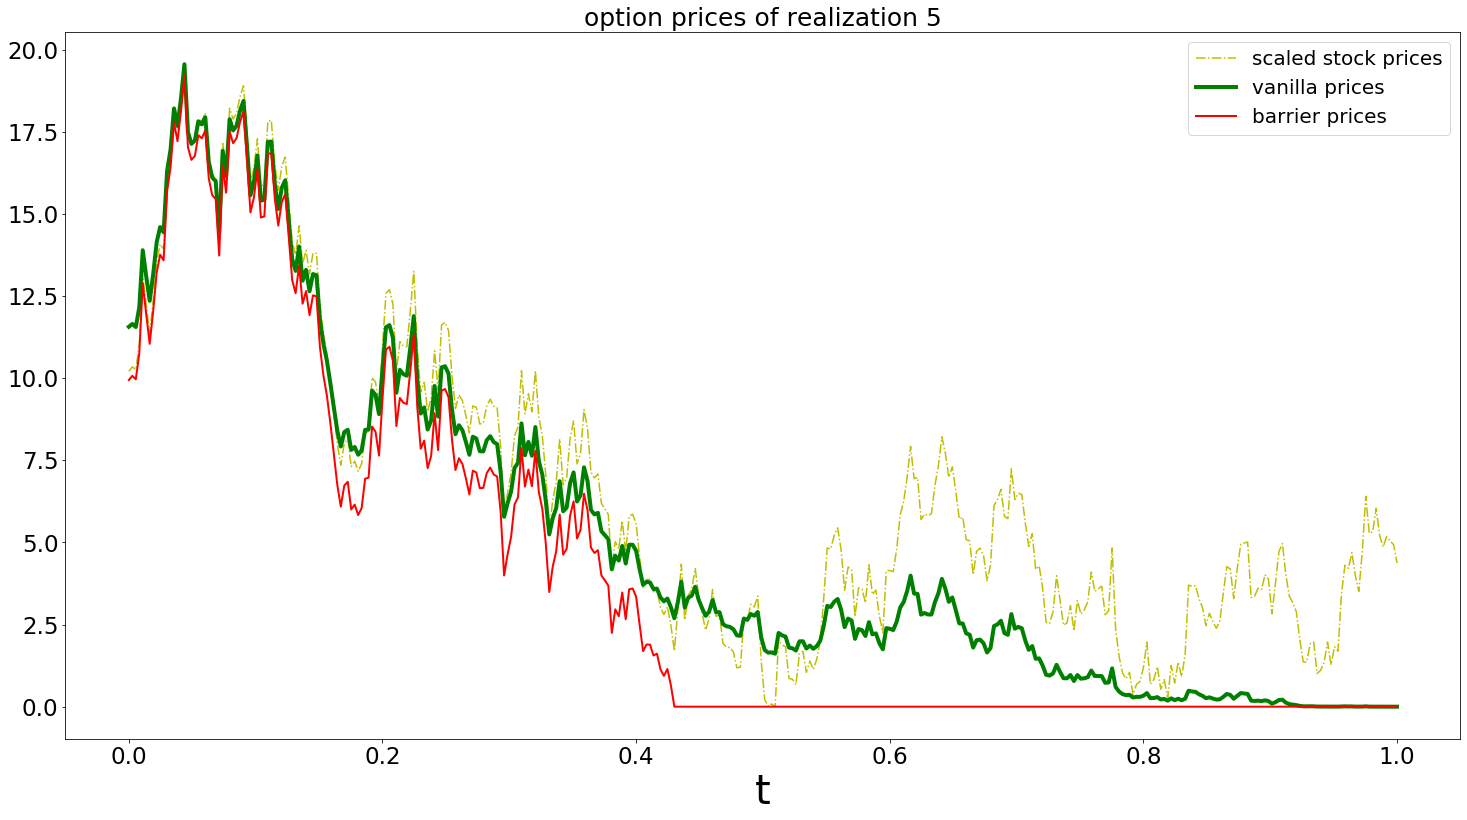

In [8]:
for i in range(0, S.shape[1]):
    vanilla_prices = vanilla(S[i], 0.1, 0.2, 365, 1, 103)
    barrier_prices = barrier(S[i], 0.1, 0.2, 365, 1, 103, 90)
    
    scaler = MinMaxScaler(feature_range=(np.min(barrier_prices), np.max(vanilla_prices)))
    scaled_stock = scaler.fit_transform(pd.DataFrame(S[i]))
  
    option_prices = pd.DataFrame(data = np.hstack((pd.DataFrame(S[i]),scaled_stock, vanilla_prices, barrier_prices)), 
                          columns=["stock prices","scaled stock prices","vanilla prices","barrier prices"])
    

    print("option prices of realization",i+1)
    print(option_prices[:6])
    print(option_prices[-6:])
    
    
    plt.figure(figsize=(25,13))  
    plt.plot(option_prices.rename(index = lambda x: x/365) ["scaled stock prices"],color='y',linestyle='-.',lw = 1.5, label="scaled stock prices")
    plt.plot(option_prices.rename(index = lambda x: x/365 ) ["vanilla prices"],color='g',lw = 4, label="vanilla prices")
    plt.plot(option_prices.rename(index = lambda x: x/365 ) ["barrier prices"],color='r',lw = 2, label="barrier prices")
    plt.xlabel('t',fontsize=40)  
    plt.ylabel('',fontsize=40)  
    
    plt.title('option prices of realization %s'%(i+1),fontsize=25)
    plt.tick_params(labelsize=23)
    plt.legend(loc = 'upper right',fontsize=20)
    plt.show()
    print('\n' * 2) 




## Remarks
- Simulations 2, 5 of stock prices vary a lot around barrier, so the probability they cross the barrier is always high, leading the barrier option prices become zero.
- After some point rest of the simulations varies far away from the barrier, resulting in lower probability of crossing the barrier thus barrier option price almost converges to vanilla price.

# Pricing Asian options

Consider a one-year Asian call option struck at 103 with $S_0$ = 100, σ = 0.2 and r = 0.1 with daily setting dates. Plot a realization of the stock price together with the arithmetic average. Using Monte Carlo plot the value of the call as a function of time using arithmetic average together with the corresponding vanilla call.

## Plot a realization of the stock price with the arithmetic average

In [9]:
# Create a configuration class to store the configuration parameters
class Config:
     def __init__(self, NumberOfSimulations, NumberOfTimesteps):
        self.NumSims= NumberOfSimulations 
        self.NumSteps = NumberOfTimesteps

In [10]:
# Create a OptionDetail class that will store option details
class OptionDetail:
    def __init__(self, ini_stock_price, strike_price, risk_free_rate, volatility, time_to_maturity):
        self.S0=ini_stock_price
        self.K=strike_price
        self.rf=risk_free_rate
        self.vol=volatility
        self.T = time_to_maturity

In [11]:
# Create a stock prices (follow GBM) simulator
class GBM:
    def __init__(self, Configuration):
        self.Config = Configuration
        
    # simulate risk factors using GBM stochastic differential equation
    def SimStockPrices(self, detail):
        stockprices = []
        
        for i in range(0, self.Config.NumSims): 
            S = np.zeros(((self.Config.NumSteps+1) ,1)) 
            S[0] = detail.S0 
            ave = np.zeros(((self.Config.NumSteps+1),1))
            ave[0] = detail.S0
            dt = detail.T/self.Config.NumSteps
            
            # for a single simulation, loop over steps
            for j in range(1, self.Config.NumSteps+1):
                S[j] = S[j-1] + detail.vol*S[j-1]*np.random.normal(scale=np.sqrt(dt), size=1)+detail.rf*S[j-1]*dt 
                ave[j] = np.sum(S, axis = 0 )/(j+1) # compute arithmetic average at each step
               
                # store 1 realization of stock prices and arithmetic average
                stockprices_1= pd.DataFrame(data = np.hstack((S, ave)), 
                                            columns=["stock price", "arithmetic average"])

            
            # Store NumSims of realizations of stock prices by append method
            stockprices.append(stockprices_1)
 
        return stockprices
    

In [12]:
config = Config(1, 365) # config
detail = OptionDetail(100, 103, 0.1, 0.2, 1)

realizedstockprice = GBM(config).SimStockPrices(detail)[0]

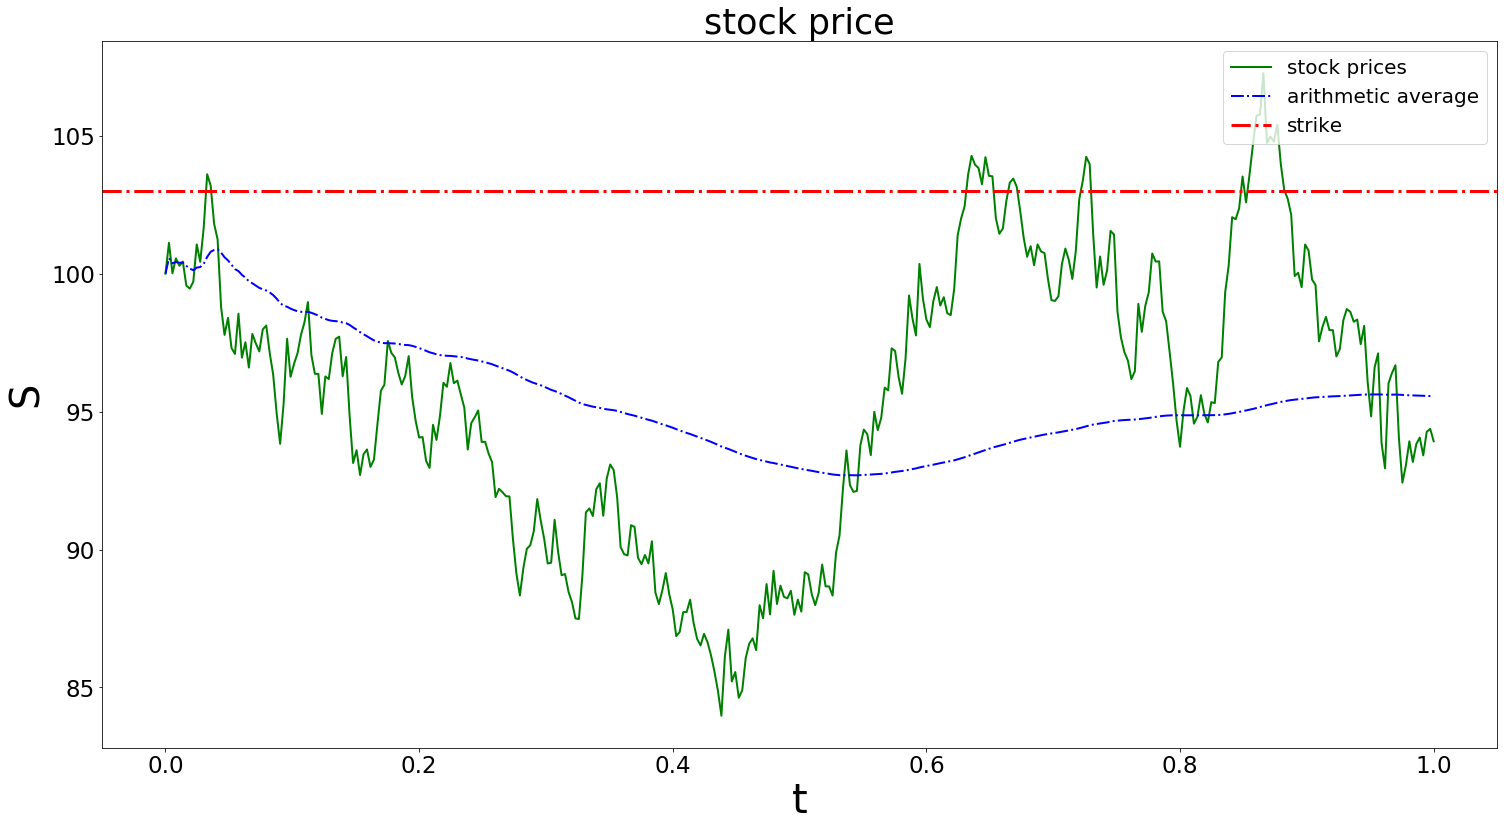

In [13]:
plt.figure(figsize=(25,13))         

plt.plot(realizedstockprice.rename(index = lambda x: x/365) ["stock price"],color = "g",linestyle='-',lw = 2, label="stock prices")
plt.plot(realizedstockprice.rename(index = lambda x: x/365) ["arithmetic average"],color = "b", linestyle='-.',lw = 2, label="arithmetic average")
plt.axhline(y=103, color='r', linestyle='-.',lw = 3,label="strike")

plt.xlabel('t',fontsize=40)  
plt.ylabel('S',fontsize=40)  
plt.title('stock price',fontsize=35)
plt.legend(loc = 'upper right',fontsize=20)
plt.tick_params(labelsize=23)

plt.show()

## Using Monte Carlo plot the value of the arithmetic asian call together with the corresponding vanilla

In [14]:
config2 = Config(100, 365) # simulate 100 paths of stock prices for MonteCarlo
MonteCarloPaths = GBM(config2).SimStockPrices(detail)

In [15]:
MonteCarloPaths[0].head()

,stock price,arithmetic average
0,100.000000,100.000000
1,102.192818,101.096409
2,101.289711,101.160843
3,103.073609,101.639035
4,102.580681,101.827364


$$C^A_t = e^{-r(T-t)}\mathbb{E}(max(\frac{1}{T} \int_0 ^T S_udu -K,0)|Y_t = y, S_t =x)$$
$$= e^{-r(T-t)}\mathbb{E}[max(\frac{1}{T} (\int_0 ^ {t} S_u du + S_t \int_t ^ {T} \frac{S_u}{S_t} du)-K, 0)] $$
$$= e^{-r(T-t)}\mathbb{E}[max(\frac{1}{T} (y+x\int_0 ^ {T-t} \frac{S_u}{S_0} du)-K, 0)] $$

In [16]:
class AsianOptionPricer:
    def __init__(self, Configuration, detail, MonteCarloPaths, realizedstockprice):
        self.Config = Configuration
        self.Detail = detail
        self.MTPaths = MonteCarloPaths
        self.SP = realizedstockprice
    
    # price at each timestep
    def StepPrice(self, step): 
        j = step
        # assign underlying prices to stock_asian
        stock_asian =  self.SP
        dt = self.Detail.T/self.Config.NumSteps
        sumofpayoff = 0 
        # initialize option price at each step
        StepPrice = 0         

        if j == 0:
            for i in range(0, self.Config.NumSims):
                sumofpayoff+= max((self.MTPaths[i]["arithmetic average"].iloc[-1] -  self.Detail.K), 0)  
        elif j == self.Config.NumSteps:
            sumofpayoff = self.Config.NumSims * max((stock_asian["arithmetic average"][j]-self.Detail.K),0)
        else : 
            for i in range(0, self.Config.NumSims):          
                integral = (j+1)*stock_asian["arithmetic average"][j]+ \
                float(stock_asian["stock price"][j]/stock_asian["stock price"][0])* \
                self.MTPaths[i]["stock price"].iloc[:(self.Config.NumSteps-j+1)].sum()
                # notice here self.Config.NumSteps-j+1, when j = N, this term is not equal to 0 which is wrong as 
                # at T there should only be realized prices, no need to use monte carlo prices 
                # need to add -elif

                sumofpayoff+= max(0, (integral/(self.Config.NumSteps+2) -  self.Detail.K))
       
        # approximate an expectation by taking the sample mean 
        exp_payoff = sumofpayoff/self.Config.NumSims  
        
        # apply pricing formula
        StepPrice = np.exp(-self.Detail.rf*(self.Detail.T-j*dt))*exp_payoff
        
        return StepPrice
    
    def Prices(self):
        asian_option_prices = np.zeros((self.Config.NumSteps+1,1))
        
        for j in range(0,self.Config.NumSteps+1):  
            asian_option_prices[j] = self.StepPrice(j)
        return asian_option_prices


In [17]:
PricerDoDo =  AsianOptionPricer(config2, detail, MonteCarloPaths, realizedstockprice)
asian_option_prices = PricerDoDo.Prices()

In [18]:
vanilla_option_prices = vanilla(realizedstockprice["stock price"], 0.1, 0.2, 365, 1, 103) 

In [19]:
dt = pd.DataFrame(data = np.hstack((asian_option_prices, vanilla_option_prices) ),
                     columns=["asian_option_prices", "vanilla_option_prices"])
dt.head()

,asian_option_prices,vanilla_option_prices
0,6.513832,11.566111
1,7.141024,12.308123
2,6.426624,11.526112
3,6.713321,11.869044
4,6.513281,11.660661


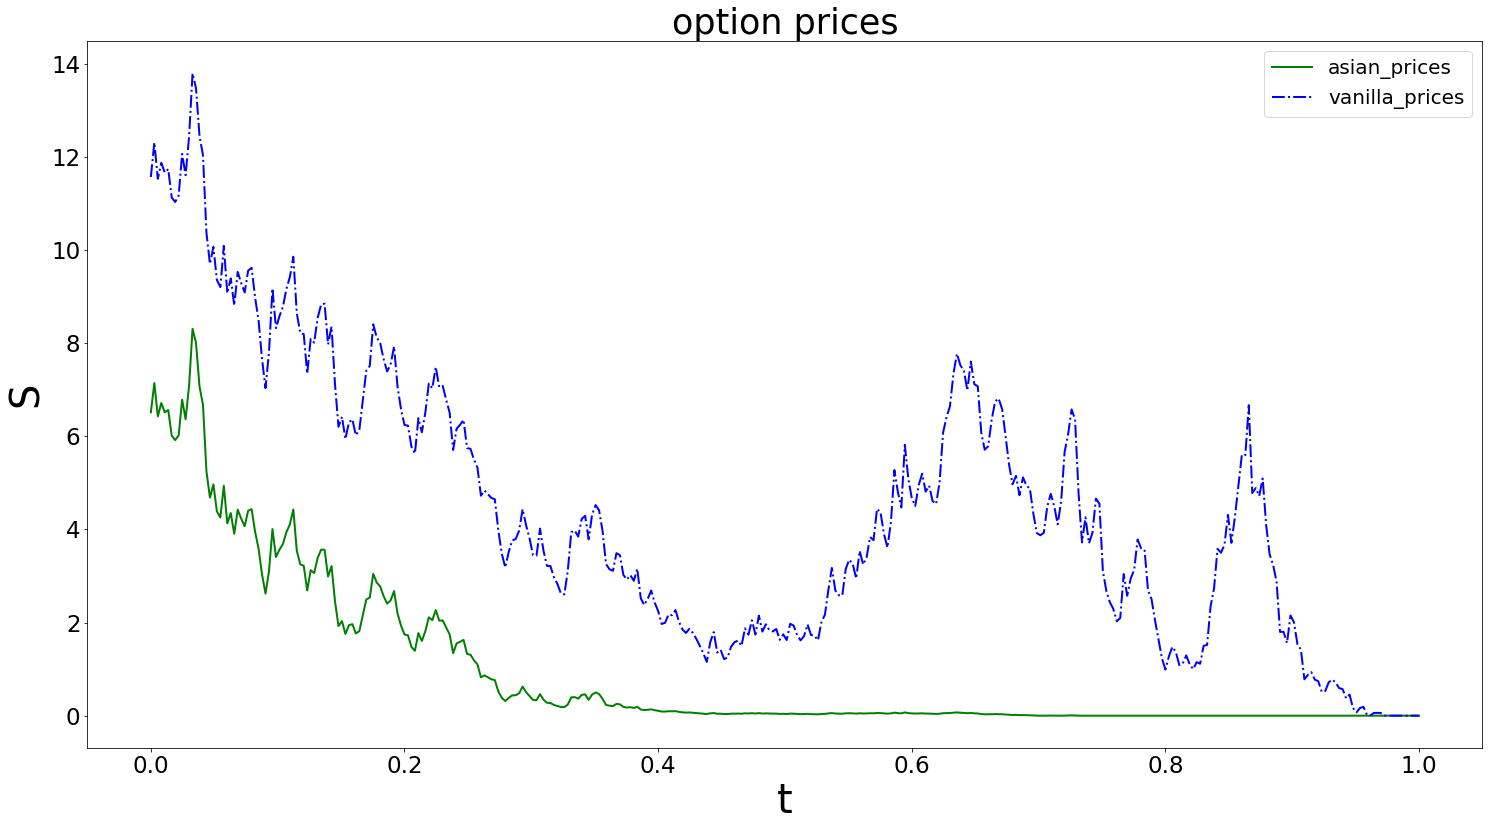

In [20]:
plt.figure(figsize=(25,13))         

plt.plot(dt.rename(index = lambda x: x/365) ["asian_option_prices"],color = "g",linestyle='-',lw = 2, label="asian_prices")
plt.plot(dt.rename(index = lambda x: x/365) ["vanilla_option_prices"],color = "b", linestyle='-.',lw = 2, label="vanilla_prices")

plt.xlabel('t',fontsize=40)  
plt.ylabel('S',fontsize=40)  
plt.title('option prices',fontsize=35)
plt.legend(loc = 'upper right',fontsize=20)
plt.tick_params(labelsize=23)

plt.show()


## Remarkes
- Asian price always below the vanilla price, reason being it smooths the path spot follows thus it smooths the volatility of the stock. Since volatility of the moving average is lower than actual price volatility, asian price is lower than vanilla price.
- Also, because moving average in general follows a path below the actual stock price, Asian is cheaper than Vanilla call. If the stock price goes down a lot and the arithmetic average goes over true price for a certain amount, Vanilla call can go down to level of Asian price. Since arithmetic average smooths the large movements, Asian price will not go down as much as Vanilla and prices may cross.
- In this particular simulation we do not observe this behaviour.
